In [220]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

In [268]:
diamonds_train = pd.read_csv('/home/julian/Cursos/Ironhack/Proyectos/Proyecto5/Diamond-Price-Prediction/train.csv')

In [269]:
diamonds_test = pd.read_csv('/home/julian/Cursos/Ironhack/Proyectos/Proyecto5/Diamond-Price-Prediction/test.csv')

In [270]:
diamonds_train.shape

(40455, 11)

In [271]:
diamonds_train.head(3)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353
1,1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183
2,2,0.72,Ideal,F,VS2,61.8,59.0,5.71,5.74,3.54,7.983


In [272]:
diamonds_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       40455 non-null  int64  
 1   carat    40455 non-null  float64
 2   cut      40455 non-null  object 
 3   color    40455 non-null  object 
 4   clarity  40455 non-null  object 
 5   depth    40455 non-null  float64
 6   table    40455 non-null  float64
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
 10  price    40455 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 3.4+ MB


In [273]:
diamonds_train.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

#### CATEGORICAL FEATURES

In [274]:
diamonds_train.cut.value_counts()

Ideal        16230
Premium      10338
Very Good     9003
Good          3682
Fair          1202
Name: cut, dtype: int64

In [275]:
dic_cut = {'Ideal': '1', 'Premium': '2', 'Very Good': '3', 'Good': '4', 'Fair': '5'}

In [276]:
diamonds_train.cut = diamonds_train.cut.map(dic_cut)

#### COLOR IS MORE IMPORTANT THAN CLARITY (ojo)

In [277]:
diamonds_train.color.value_counts()

G    8410
E    7368
F    7182
H    6203
D    5100
I    4070
J    2122
Name: color, dtype: int64

In [278]:
#THE COLOR SCALE STARTS AT D, WICH IS NOT TOP QUALITY

In [279]:
dic_color = {'D': '1', 'E': '2', 'F': '3', 'G': '4', 'H': '5', 'I': '6', 'J': '7'}

In [280]:
diamonds_train.color = diamonds_train.color.map(dic_color)

In [281]:
diamonds_train.color.value_counts()

4    8410
2    7368
3    7182
5    6203
1    5100
6    4070
7    2122
Name: color, dtype: int64

In [282]:
diamonds_train.clarity.unique()

array(['SI2', 'VVS2', 'VS2', 'VS1', 'SI1', 'VVS1', 'IF', 'I1'],
      dtype=object)

In [283]:
dic_clarity = {'I1': '1', 'SI2': '2', 'SI1': '3', 'VS2': '4', 'VS1': '5', 'VVS2': '6', 'VVS1': '7', 'IF': '8'}

In [284]:
diamonds_train.clarity = diamonds_train.clarity.map(dic_clarity)

In [285]:
diamonds_train.drop(columns=['id', 'depth'], inplace=True)

In [286]:
diamonds_train_corr = diamonds_train.corr()

In [287]:
diamonds_train_corr

,carat,table,x,y,z,price
carat,1.000000,0.185478,0.974648,0.944419,0.947469,0.920064
table,0.185478,1.000000,0.200374,0.186788,0.153726,0.162804
x,0.974648,0.200374,1.000000,0.967315,0.965496,0.957668
y,0.944419,0.186788,0.967315,1.000000,0.941176,0.928909
z,0.947469,0.153726,0.965496,0.941176,1.000000,0.930014
price,0.920064,0.162804,0.957668,0.928909,0.930014,1.000000


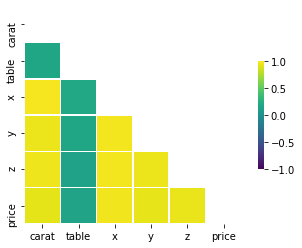

In [288]:
mascara = np.triu(np.ones_like(diamonds_train_corr, dtype=bool))
color_map = sns.diverging_palette(0, 10, as_cmap=True) 

sns.heatmap(diamonds_train_corr, 
            mask=mascara,
            cmap="viridis",
            vmax=1,
            vmin=-1,
            square=True, 
            linewidth=.5, 
            cbar_kws={"shrink": .5} 
);

In [289]:
X = diamonds_train.drop('price', axis=1)

In [290]:
y = diamonds_train.price

In [320]:
y.value_counts()

6.405    101
6.438     96
6.687     94
6.719     94
6.654     91
        ... 
5.881      1
7.146      1
5.903      1
5.864      1
5.852      1
Name: price, Length: 3512, dtype: int64

<AxesSubplot:xlabel='price', ylabel='Count'>

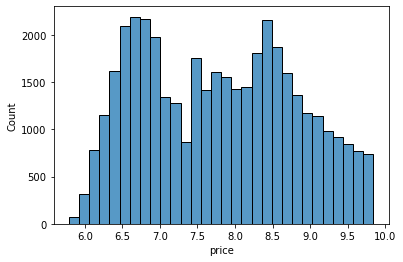

In [309]:
sns.histplot(y, bins=30)

/home/julian/miniconda3/envs/ironcon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

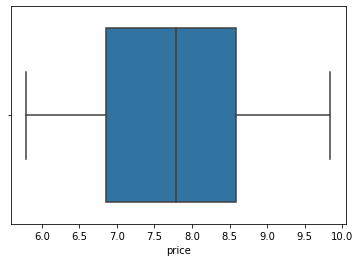

In [317]:
sns.boxplot(y)

In [292]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [293]:
from sklearn.feature_selection import f_regression

In [294]:
linear_model = LinearRegression()

In [295]:
linear_model.fit(X_train,y_train)

LinearRegression()

In [296]:
y_train_pred = linear_model.predict(X_train)

In [297]:
(mean_squared_error(y_train, y_train_pred)) ** 0.5

0.20363262376034497

In [298]:
y_test_pred = linear_model.predict(X_test)

In [299]:
(mean_squared_error(y_test, y_test_pred)) ** 0.5

0.18372817911812642

In [256]:
#linear_model_ = smf.ols("price ~ X", data=diamonds_train).fit()
#linear_model_.summary()

In [257]:
diamonds_test.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.32,Ideal,I,SI1,60.5,58.0,4.43,4.49,2.70
1,1,1.24,Premium,I,SI1,62.9,60.0,6.80,6.74,4.26
2,2,1.66,Premium,D,SI1,62.0,59.0,7.55,7.60,4.70
3,3,0.75,Premium,D,SI2,60.6,56.0,5.94,5.90,3.59
4,4,1.50,Fair,E,SI2,64.8,55.0,7.26,7.15,4.67


In [258]:
diamonds_test.clarity = diamonds_test.clarity.map(dic_clarity)

In [259]:
diamonds_test.color = diamonds_test.color.map(dic_color)

In [260]:
diamonds_test.cut = diamonds_test.cut.map(dic_cut)

In [261]:
diamonds_test

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.32,1,6,3,60.5,58.0,4.43,4.49,2.70
1,1,1.24,2,6,3,62.9,60.0,6.80,6.74,4.26
2,2,1.66,2,1,3,62.0,59.0,7.55,7.60,4.70
3,3,0.75,2,1,2,60.6,56.0,5.94,5.90,3.59
4,4,1.50,5,2,2,64.8,55.0,7.26,7.15,4.67
...,...,...,...,...,...,...,...,...,...,...
13480,13480,1.10,2,4,3,59.6,60.0,6.74,6.70,4.00
13481,13481,0.90,3,1,3,62.1,60.0,6.14,6.20,3.83
13482,13482,0.30,1,3,4,62.1,53.3,4.30,4.32,2.68
13483,13483,1.25,1,6,3,59.6,59.0,7.01,7.09,4.20


In [262]:
y_price_pred = random_forest.predict(diamonds_test)

NameError: name 'random_forest' is not defined

In [ ]:
y_price_pred

In [ ]:
diamonds_test['price'] = y_price_pred

In [ ]:
diamonds_test.drop(columns=['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z'], inplace=True)

In [ ]:
diamonds_test

In [ ]:
diamonds_test.to_csv('diamonds_sub.csv', index = False)